# Intro to Regression with Keras

**OBJECTIVES**

- Build regression models using `keras`
- Refine models adjusting the architecture of a network
- Use regularization to attempt performance improvement
- Save and reuse the model

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from keras.layers import Input
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2, l1_l2
from keras.callbacks import EarlyStopping

In [2]:
cali = fetch_california_housing()
X, y = cali.data, cali.target

### Problem 1

Load the california housing data and create a dataframe called `cali_df` below.  Make sure to add the target feature and name this `price`. 

In [5]:
cali_df = pd.DataFrame(X, columns=cali.feature_names)

In [7]:
cali_df.loc[:,'price'] = y

In [8]:
cali_df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


### Problem 2

Create a train/test split with just the `MedInc` feature as your input.

In [10]:
X = cali_df[['MedInc']]
y = cali_df['price']

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=3)

### Problem 3

Setup a `Sequential` model with one layer containing 24 nodes.  Make sure to include the output layer and use a relu activation for the hidden layer.

In [38]:
model = keras.Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(24, activation="relu"))
model.add(Dense(1))

### Problem 3

Set up the compilation of the network.  Use an adam optimizer and appropriate loss function with the mean squared error metric.

In [39]:
model.compile(loss='mae', optimizer='adam', metrics=['mse'])

### Problem 4

Fit the model on the training data with 100 epochs (and sequester the output with `verbose = 0`). Save the fit model to the variable `history`.

In [40]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

### Problem 5

Use `matplotlib` to plot the training loss and validation loss, and the training mean squared error alongside the validation data. Try to make them side by side subplots using fig,ax.

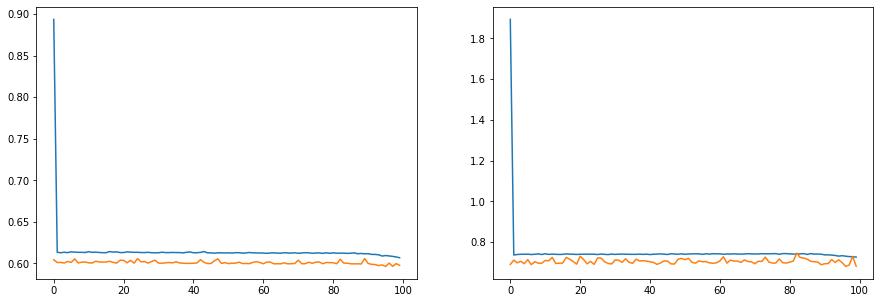

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss');
plt.plot(history.history['val_loss'], label='Testing Loss');

plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Test MSE');

### Problem 6

Let's make a second network that is a bit deeper and more complex. Also, let's now use all the features and see if we help the model.  Use 3 layers, with 64, 128, and 64 nodes respectively in the hidden layers and a `relu` activation function.

In [46]:
model2 = Sequential()
model2.add(Input(shape=(1,)))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(128, activation= 'relu'))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(1))

In [47]:
model2.compile(loss='mae', optimizer='adam', metrics=['mse'])

In [48]:
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

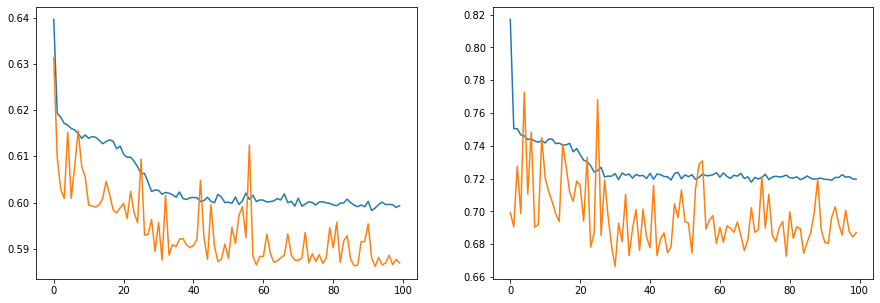

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss');
plt.plot(history2.history['val_loss'], label='Testing Loss');

plt.subplot(1, 2, 2)
plt.plot(history2.history['mse'], label='Train MSE')
plt.plot(history2.history['val_mse'], label='Test MSE');

### Problem 7

Add a `BatchNormalization` layer prior to our first dense layer in the network above and repeat the fit.  Does this change anything?

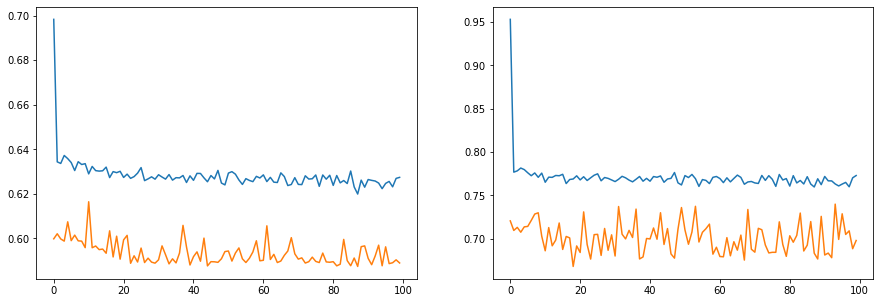

In [50]:
model3 = Sequential()
model3.add(Input(shape=(1,)))
model3.add(BatchNormalization())
model3.add(Dense(64,activation='relu'))
model3.add(Dense(128, activation= 'relu'))
model3.add(Dense(64,activation='relu'))
model3.add(Dense(1))

model3.compile(loss='mae', optimizer='adam', metrics=['mse'])
history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

fig, ax = plt.subplots(1, 2, figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(history3.history['loss'], label='Training Loss');
plt.plot(history3.history['val_loss'], label='Testing Loss');

plt.subplot(1, 2, 2)
plt.plot(history3.history['mse'], label='Train MSE')
plt.plot(history3.history['val_mse'], label='Test MSE');

### Problem 8

Early Stopping.  It seems that we may not need all 100 epocs to train the data.  Include an `EarlyStopping` callback in your model from above.  Set the `patience` equal to 5.  How many epochs do you think are appropriate?

In [53]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [54]:
model4 = Sequential()
model4.add(Input(shape=(1,)))
model4.add(BatchNormalization())
model4.add(Dense(64,activation='relu'))
model4.add(Dense(128, activation= 'relu'))
model4.add(Dense(64,activation='relu'))
model4.add(Dense(1))

model4.compile(loss='mae', optimizer='adam', metrics=['mse'])

history4 = model4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,verbose=0, callbacks=[early_stop])

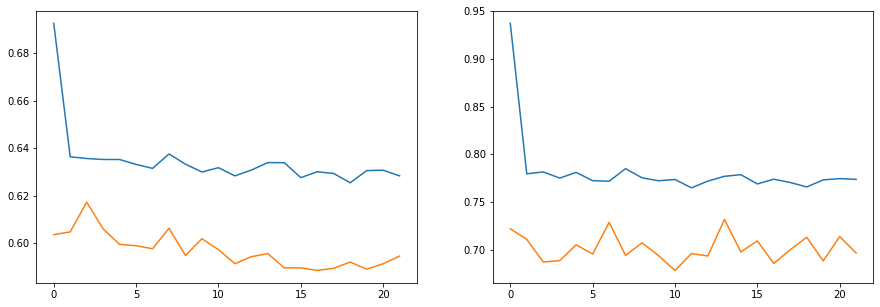

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(history4.history['loss'], label='Training Loss');
plt.plot(history4.history['val_loss'], label='Testing Loss');

plt.subplot(1, 2, 2)
plt.plot(history4.history['mse'], label='Train MSE')
plt.plot(history4.history['val_mse'], label='Test MSE');

### Problem 9

Adding `Dropout`.  Let's add a 5% dropout to the second layer, and a 20% dropout to the third layer and see if we end up stopping sooner or performing better.

In [56]:
model5 = Sequential()
model5.add(Input(shape=(1,)))
model5.add(BatchNormalization())
model5.add(Dense(64,activation='relu'))
model5.add(Dense(128, activation= 'relu'))
model5.add(Dropout(0.05))
model5.add(Dense(64,activation='relu'))
model5.add(Dropout(.20))
model5.add(Dense(1))

model5.compile(loss='mae', optimizer='adam', metrics=['mse'])

history5 = model5.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,verbose=0, callbacks=[early_stop])

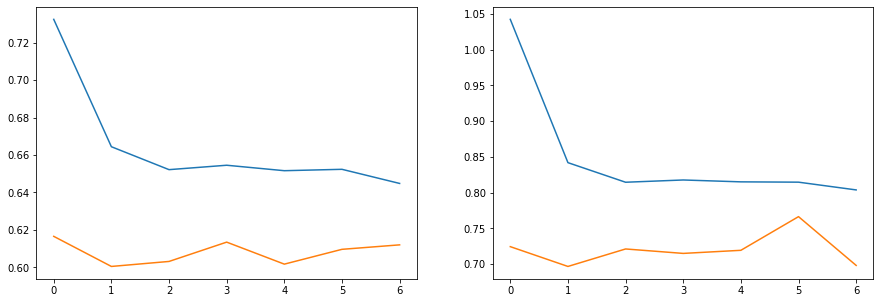

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(history5.history['loss'], label='Training Loss');
plt.plot(history5.history['val_loss'], label='Testing Loss');

plt.subplot(1, 2, 2)
plt.plot(history5.history['mse'], label='Train MSE')
plt.plot(history5.history['val_mse'], label='Test MSE');

### Problem 9: RMSE vs. Baseline

Compare the model aboves performance to that of the baseline model for the data.

In [72]:
# bsseline

In [65]:
y_base = np.array([y.mean()] * (len(y_test)))

In [68]:
y_base.shape

(5160,)

In [71]:
mean_squared_error(y_test,y_base) ** (1/2)

1.1488520222571497

In [73]:
# predicts

In [74]:
preds = model5.predict(X_test)
mean_squared_error(y_test,preds) ** (1/2)

0.8355523874132675

In [75]:
# better than baseline

### Problem 10: Regularization and Scaling

Finally, we want to see if regularizing will improve the model.  Feed a model that is identical to the one above including dropout and include `l2` regularization in each of the dense layers of 0.01.  What is the RMSE of this model?  How does it compare to the baseline?

In [76]:
model6 = Sequential()
model6.add(Input(shape=(1,)))
model6.add(BatchNormalization())
model6.add(Dense(64,activation='relu', kernel_regularizer=l2(0.01)))
model6.add(Dense(128, activation= 'relu', kernel_regularizer=l2(0.01)))
model6.add(Dropout(0.05))
model6.add(Dense(64,activation='relu', kernel_regularizer=l2(0.01)))
model6.add(Dropout(.20))
model6.add(Dense(1))

model6.compile(loss='mae', optimizer='adam', metrics=['mse'])

history6 = model6.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,verbose=0, callbacks=[early_stop])

In [78]:
preds2 = model6.predict(X_test)
mean_squared_error(y_test, preds2) ** (1/2)

0.8320713628752009

In [79]:
# the RMSE decrase a little bit.

### Problem 11: Saving the Model

Save the model as `cali_housing.h5`.  

In [80]:
model6.save('cali_housing.h5')